In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import linalg
import time

from sklearn.decomposition import dict_learning_online
from sklearn.decomposition import sparse_encode,dict_learning

from sklearn.decomposition._dict_learning_na import sparse_encode_na,\
                                            update1, dict_learning_na,\
                                            update_dict_na, get_loss_na,\
                                            get_code_dict_learning_na,\
                                            reconstruction_error


from sklearn.decomposition._dict_learning import get_loss
from sklearn.decomposition.bench_dict_learning import *
from sklearn.decomposition.bench_reconstruction import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import warnings
warnings.filterwarnings('ignore')

100;0.1.2.3.250;0.1.2.3.500;0.1.2.3.1000;0.1.2.3.2500;0.1.2.3.5000;0.1.2.3.7500;0.1.2.3.10000;0.1.2.3.

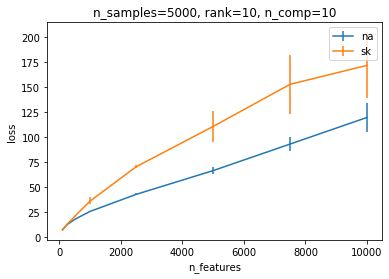

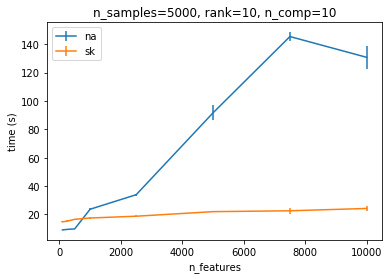

In [51]:
############ compare loss & time w.r.t sklearn (without Nan)
bench_feat(n_samples = 5000, n_features = 200, rank = 10, n_components = 10)

5;45;85;125;165;205;245;285;325;365;405;445;485;

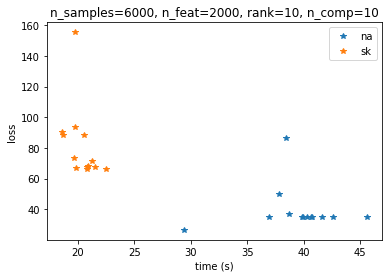

In [50]:
bench_time_loss()
# il semblerait qu'augmenter le nombre d'iterations n'influence pas tellement le temsp de calcul ou la loss.

8;10;12;

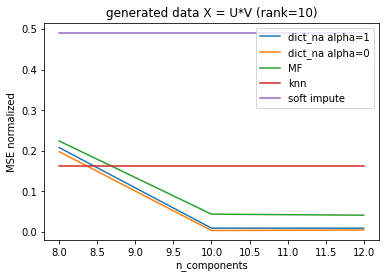

In [38]:
########### reconstruction loss on generated    
bench_reconstruction(data = 'generated')
# les résultats sont proche de zero car les data sont généré.

5;10;15;

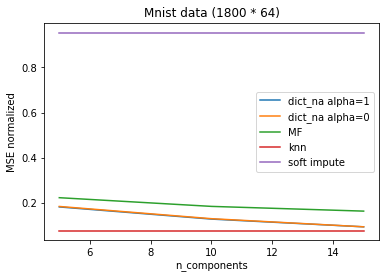

In [48]:
bench_reconstruction(data = 'digits')

5;

KeyboardInterrupt: 

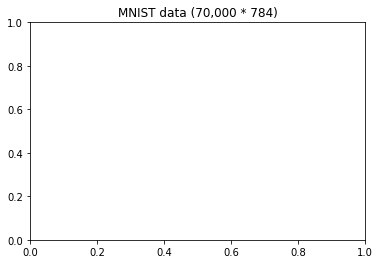

In [7]:
bench_reconstruction(data = 'mnist')

In [8]:
from fancyimpute import MatrixFactorization
X, X_na, missing_mask = create_mnist_dataset(fraction_missing=0.1)

In [11]:
for lr in [.001, .005, .0005]:
    X_completed_test = MatrixFactorization(rank=15, learning_rate=lr, epochs=5000, l2_penalty=1e-5, verbose = 0).fit_transform(X_na)
    mse_mf = reconstruction_error(X, X_completed_test, missing_mask, verbose = 0)[0]
    print(mse_mf)

AttributeError: module 'tensorflow.python.framework.ops' has no attribute '_TensorLike'